<a href="https://colab.research.google.com/github/a33211/Data-science-homeworks/blob/main/Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Завдання_1**


Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

In [12]:
import pandas as pd
from google.colab import files
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df_2d = pd.read_csv('/content/drive/MyDrive/GOIT_DS_Course_data/6_task_data/data_2d.csv')
df_mnist = pd.read_csv('/content/drive/MyDrive/GOIT_DS_Course_data/6_task_data/mnist.csv')
inertias_df_2d = []
k_values_df_2d = []
inertias__mnist = []
k_values__mnist = []

In [ ]:
# Розрахунок кількості центроїдів для першого датасету (df_2d) в збільшеній кількості ітерацій 20
for k in range(1, 21):
    # Створення моделі KMeans
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_2d)
    
    # Збереження цінерції та числа ценроїдів
    inertias_df_2d.append(kmeans.inertia_)
    k_values_df_2d.append(k)

In [ ]:
# Розрахунок кількості центроїдів для другого датасету (df_mnist) в зменшеній кількості ітерацій  10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_mnist)
    inertias__mnist.append(kmeans.inertia_)
    k_values__mnist.append(k)

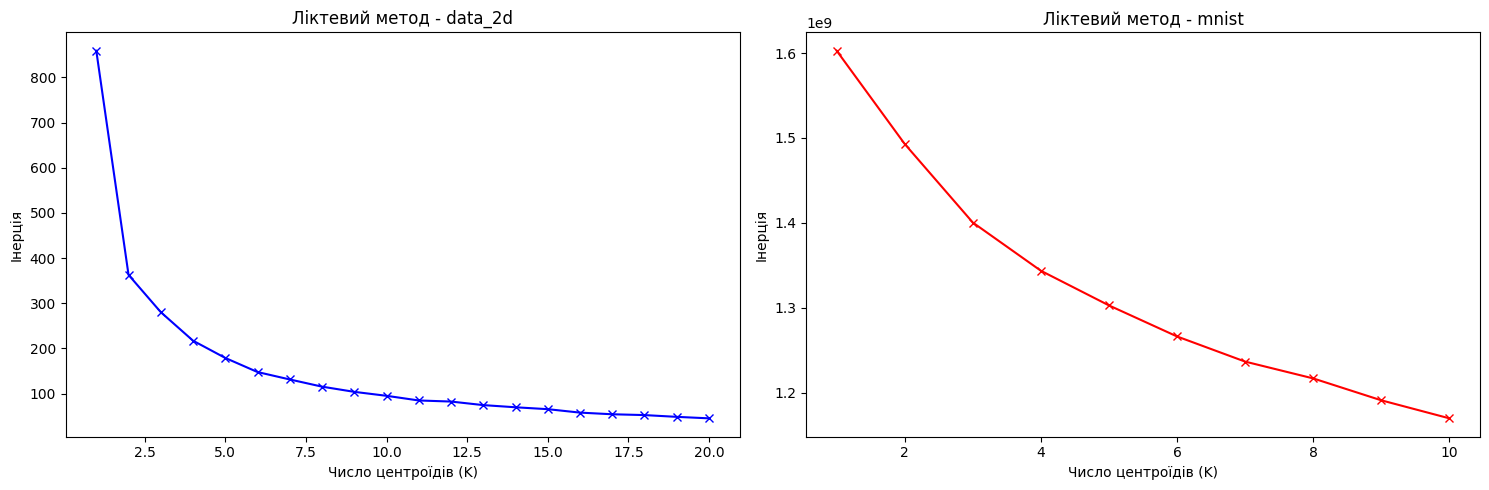

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Графік першого датасета
axs[0].plot(k_values_df_2d, inertias_df_2d, 'bx-')
axs[0].set_xlabel('Число центроїдів (K)')
axs[0].set_ylabel('Інерція')
axs[0].set_title('Ліктевий метод - data_2d')

# Графік другого датасета
axs[1].plot(k_values__mnist, inertias__mnist, 'rx-')
axs[1].set_xlabel('Число центроїдів (K)')
axs[1].set_ylabel('Інерція')
axs[1].set_title('Ліктевий метод - mnist')

plt.tight_layout()
plt.show()

# **Завдання 2**


Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоримтом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [24]:
df_mnist.columns

Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=785)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


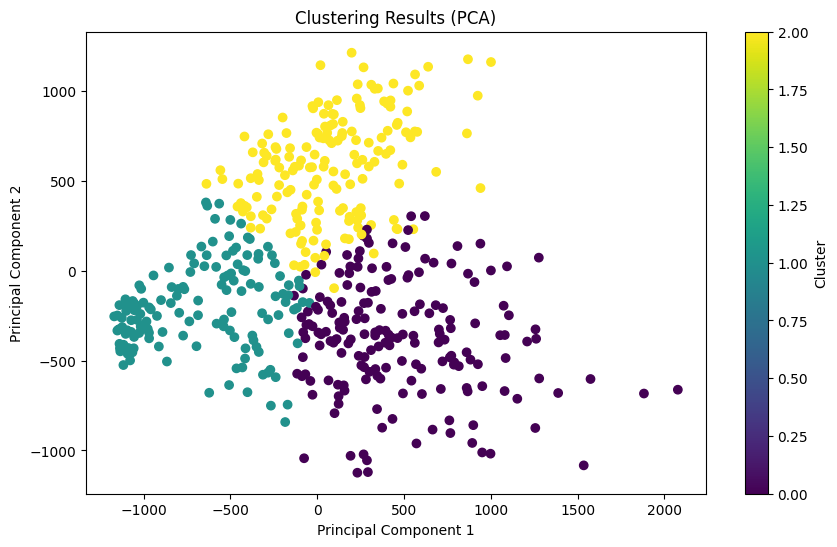

In [27]:
#Кластеризую дані з датасету
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_mnist)

#PCA
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(df_mnist)


plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.title('Clustering Results (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()